In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df=pd.read_excel('DS_FILE2.xlsx')
df.head(5)

,TIMESTAMP,AGE,GENDER,COUNTRY,FAMILY_HISTORY,TREATMENT,WORK_INTERFERE,BENEFIT,SEEK_HELP,MENTAL_HEALTH_AFFECT,PHYSICAL_HEALTH_AFFECT
0,2014-08-29 17:26:15,18,Male,United States,No,No,Never,No,No,No,Maybe
1,2014-08-27 11:43:10,18,Male,Netherlands,No,No,Often,No,No,No,No
2,2014-08-27 12:15:11,18,Male,Russia,No,No,Yes,Yes,No,Yes,Yes
3,2014-08-27 12:31:43,18,Male,United States,No,Yes,Rarely,No,No,No,No
4,2014-08-27 14:10:15,18,Male,United States,No,Yes,Never,Don't know,Don't know,No,Maybe


In [4]:
df

,TIMESTAMP,AGE,GENDER,COUNTRY,FAMILY_HISTORY,TREATMENT,WORK_INTERFERE,BENEFIT,SEEK_HELP,MENTAL_HEALTH_AFFECT,PHYSICAL_HEALTH_AFFECT
0,2014-08-29 17:26:15,18,Male,United States,No,No,Never,No,No,No,Maybe
1,2014-08-27 11:43:10,18,Male,Netherlands,No,No,Often,No,No,No,No
2,2014-08-27 12:15:11,18,Male,Russia,No,No,Yes,Yes,No,Yes,Yes
3,2014-08-27 12:31:43,18,Male,United States,No,Yes,Rarely,No,No,No,No
4,2014-08-27 14:10:15,18,Male,United States,No,Yes,Never,Don't know,Don't know,No,Maybe
...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-02-24 10:32:32,60,Male,United States,No,Yes,Often,Don't know,Don't know,No,Maybe
1255,2014-08-29 01:20:32,61,Male,South Africa,No,Yes,Never,No,No,No,Maybe
1256,2014-08-27 17:12:01,62,Male,United States,No,No,Never,Yes,Yes,Maybe,Maybe
1257,2014-08-27 19:17:07,65,Male,United States,No,No,Yes,No,No,No,No


In [5]:
df.isnull().sum()

TIMESTAMP                 0
AGE                       0
GENDER                    0
COUNTRY                   0
FAMILY_HISTORY            0
TREATMENT                 0
WORK_INTERFERE            0
BENEFIT                   0
SEEK_HELP                 0
MENTAL_HEALTH_AFFECT      0
PHYSICAL_HEALTH_AFFECT    0
dtype: int64

In [6]:
age = df.groupby(['AGE'])['AGE'].count()
age

AGE
18     9
19    11
20     6
21    16
22    21
23    52
24    46
25    61
26    76
27    71
28    68
29    87
30    63
31    67
32    82
33    70
34    65
35    55
36    37
37    43
38    39
39    33
40    33
41    21
42    20
43    28
44    11
45    12
46    12
47     2
48     6
49     4
50     6
51     5
53     1
54     3
55     3
56     4
57     3
58     1
60     2
61     1
62     1
65     1
72     1
Name: AGE, dtype: int64

<Axes: xlabel='AGE'>

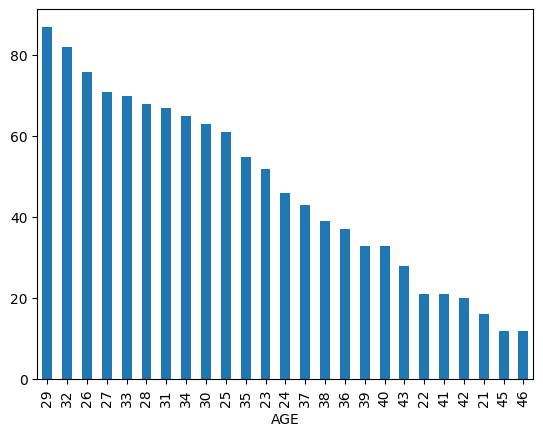

In [7]:
(df.AGE).value_counts().head(25).plot(kind='bar')

In [8]:
fh=df.groupby(['FAMILY_HISTORY'])['FAMILY_HISTORY'].count()
fh

FAMILY_HISTORY
No     767
Yes    492
Name: FAMILY_HISTORY, dtype: int64

In [9]:
fig= px.pie(fh,fh.index, fh.values,title ='Family History')
fig.show()

In [10]:
c1=df.loc[df['FAMILY_HISTORY'] =='Yes'].groupby(['FAMILY_HISTORY','COUNTRY'])['AGE'].count()
c1

FAMILY_HISTORY  COUNTRY               
Yes             Australia                  11
                Austria                     1
                Bahamas, The                1
                Belgium                     1
                Bosnia and Herzegovina      1
                Brazil                      2
                Canada                     27
                Croatia                     1
                Czech Republic              1
                Denmark                     2
                France                      2
                Germany                    14
                Hungary                     1
                India                       1
                Ireland                     9
                Israel                      1
                Italy                       2
                Japan                       1
                Mexico                      1
                Netherlands                 8
                New Zealand              

<Axes: title={'center': 'Family history =>Yes'}, xlabel='FAMILY_HISTORY,COUNTRY'>

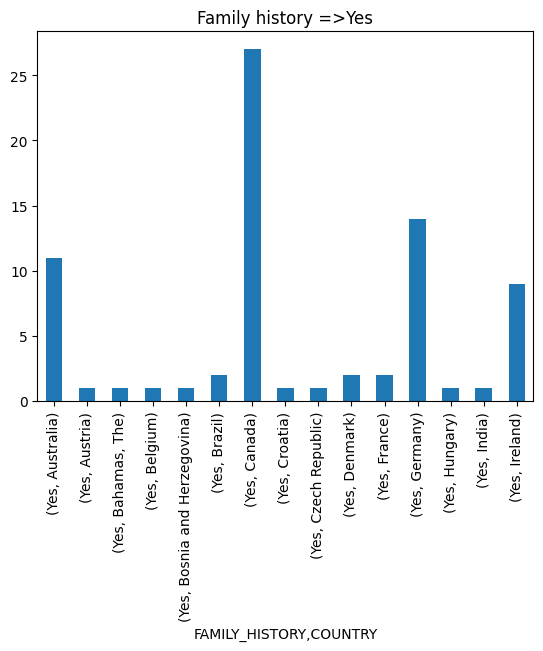

In [11]:
c1.head(15).plot(kind='bar',title='Family history =>Yes')

In [12]:
gd=df.groupby(['GENDER'])['GENDER'].count()
gd

GENDER
Female    265
Male      994
Name: GENDER, dtype: int64

In [13]:
fig= px.pie(gd,gd.index, gd.values,title ='Gender')
fig.show()

In [14]:
'''status=df.pivot_table(values='FAMILY_HISTORY',
                         index='COUNTRY', 
                         columns='Status',
                         aggfunc='sum')
status
'''

"status=df.pivot_table(values='FAMILY_HISTORY',\n                         index='COUNTRY', \n                         columns='Status',\n                         aggfunc='sum')\nstatus\n"

In [15]:
gd=df.groupby(['GENDER'])['GENDER'].count()
gd

GENDER
Female    265
Male      994
Name: GENDER, dtype: int64

In [16]:
fig= px.pie(gd,gd.index, gd.values,title ='Gender')
fig.show()

In [17]:
table_data = [['Gender', 'Work Interfere', 'Family History'],
              ['Male','Never','No'],
              ['Male','Often','No'],
              ['Male','Yes','No'],
              ['Male','Rarely','No'],
              ['Male','Never','No'],
              ['Male','Never','No'],
              ['Male','Yes','No'],
              ['Female','Never','Yes'],
              ['Female','Often','Yes'],
              ['Male','Yes','No'],
              ]

# Initialize a figure with ff.create_table(table_data)
fig = ff.create_table(table_data, height_constant=30)
fig.show()

# 1st Graph

In [18]:
top_20_countries = df["COUNTRY"].value_counts().nlargest(10).index.tolist()
data_filtered = df[df["COUNTRY"].isin(top_20_countries)]

# Group data by country and family history response
grouped_data = (
    data_filtered.groupby(["COUNTRY", "FAMILY_HISTORY"])
    .size()
    .to_frame(name="Count")
    .reset_index()
)

# Create the bar graph using Plotly
fig = px.bar(
    grouped_data,
    x="COUNTRY",
    y="Count",
    color="FAMILY_HISTORY",
    barmode="group",
    title="Family History Distribution by Country",
)

# Customize the graph (optional)
fig.update_layout(
    xaxis_title="COUNTRY",
    yaxis_title="Number of Respondents",
    legend_title="FAMILY_HISTORY",
)

# Display the graph
fig.show()


In [19]:
age=df.loc[df['AGE']<=30].groupby(['FAMILY_HISTORY'])['AGE'].count()
age


FAMILY_HISTORY
No     369
Yes    218
Name: AGE, dtype: int64

In [20]:
fig= px.pie(age,age.index, age.values, title ='Family History for Age<=30')
fig.show()

In [21]:
age1=df.loc[df['AGE'] >30].groupby(['FAMILY_HISTORY'])['AGE'].count()
age1

FAMILY_HISTORY
No     398
Yes    274
Name: AGE, dtype: int64

In [22]:
fig= px.pie(age1,age1.index, age1.values, title ='Family History for Age>30')
fig.show()

# 2nd Graph

In [23]:
# Create separate histograms for each combination of Physical health and Mental health
for phy_health in ["Yes", "No"]:
    for men_health in ["Yes", "No"]:
        filtered_df = df[(df["PHYSICAL_HEALTH_AFFECT"] == phy_health) & (df["MENTAL_HEALTH_AFFECT"] == men_health)]
        fig = px.histogram(filtered_df, x="AGE", title=f"Age Distribution for Physical Health: {phy_health}, Mental Health: {men_health}")
        fig.show()

In [24]:
phy = df.groupby(['AGE'])['PHYSICAL_HEALTH_AFFECT'].count()
phy

AGE
18     9
19    11
20     6
21    16
22    21
23    52
24    46
25    61
26    76
27    71
28    68
29    87
30    63
31    67
32    82
33    70
34    65
35    55
36    37
37    43
38    39
39    33
40    33
41    21
42    20
43    28
44    11
45    12
46    12
47     2
48     6
49     4
50     6
51     5
53     1
54     3
55     3
56     4
57     3
58     1
60     2
61     1
62     1
65     1
72     1
Name: PHYSICAL_HEALTH_AFFECT, dtype: int64

In [26]:
# long_df = px.df.phy()

# fig = px.bar(long_df, x="AGE", y="count", color="medal", title="Age Distribution for Physical Health")
# fig.show()

In [28]:
'''# Define age categories
age_bins = [0, 20, 30, 40, 50, 100]
age_labels = ["Under 20", "20-29", "30-39", "40-49", "50+"]

# Create age category column
df["AGE"] = pd.cut(df["AGE"], bins=age_bins, labels=age_labels)
'''


'# Define age categories\nage_bins = [0, 20, 30, 40, 50, 100]\nage_labels = ["Under 20", "20-29", "30-39", "40-49", "50+"]\n\n# Create age category column\ndf["AGE"] = pd.cut(df["AGE"], bins=age_bins, labels=age_labels)\n'

In [ ]:
'''grouped_d = (
    df.groupby(["AGE", "PHYSICAL_HEALTH_AFFECT"])
    .size()
    .to_frame(name="Count")
    .unstack(fill_value=0)
    .reset_index()
)
'''


In [27]:
'''# Create the bar graph using Plotly
fig = px.bar(
    grouped_d,
    x="AGE",
    y="Count",
    color="PHYSICAL_HEALTH_AFFECT",
    barmode="stack",
    title="Physical Health Distribution by Age",
)

# Customize labels and layout (optional)
fig.update_layout(
    xaxis_title="Age Category",
    yaxis_title="Number of Respondents",
    legend_title="Physical Health Status",
)


fig.show()
'''

'# Create the bar graph using Plotly\nfig = px.bar(\n    grouped_d,\n    x="AGE",\n    y="Count",\n    color="PHYSICAL_HEALTH_AFFECT",\n    barmode="stack",\n    title="Physical Health Distribution by Age",\n)\n\n# Customize labels and layout (optional)\nfig.update_layout(\n    xaxis_title="Age Category",\n    yaxis_title="Number of Respondents",\n    legend_title="Physical Health Status",\n)\n\n\nfig.show()\n'

In [ ]:
df

,TIMESTAMP,AGE,GENDER,COUNTRY,FAMILY_HISTORY,TREATMENT,WORK_INTERFERE,BENEFIT,SEEK_HELP,MENTAL_HEALTH_AFFECT,PHYSICAL_HEALTH_AFFECT
0,2014-08-29 17:26:15,18,Male,United States,No,No,Never,No,No,No,Maybe
1,2014-08-27 11:43:10,18,Male,Netherlands,No,No,Often,No,No,No,No
2,2014-08-27 12:15:11,18,Male,Russia,No,No,Yes,Yes,No,Yes,Yes
3,2014-08-27 12:31:43,18,Male,United States,No,Yes,Rarely,No,No,No,No
4,2014-08-27 14:10:15,18,Male,United States,No,Yes,Never,Don't know,Don't know,No,Maybe
...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-02-24 10:32:32,60,Male,United States,No,Yes,Often,Don't know,Don't know,No,Maybe
1255,2014-08-29 01:20:32,61,Male,South Africa,No,Yes,Never,No,No,No,Maybe
1256,2014-08-27 17:12:01,62,Male,United States,No,No,Never,Yes,Yes,Maybe,Maybe
1257,2014-08-27 19:17:07,65,Male,United States,No,No,Yes,No,No,No,No


# 4th graph

In [ ]:
Tyes=df.loc[df['TREATMENT'] == 'Yes'].groupby(['COUNTRY','TREATMENT'])['TREATMENT'].count()
Tyes

COUNTRY         TREATMENT
Australia       Yes           13
Bahamas, The    Yes            1
Belgium         Yes            1
Brazil          Yes            2
Bulgaria        Yes            2
Canada          Yes           37
Croatia         Yes            2
Denmark         Yes            2
Finland         Yes            1
France          Yes            2
Germany         Yes           21
India           Yes            3
Ireland         Yes           13
Italy           Yes            1
Japan           Yes            1
Mexico          Yes            1
Moldova         Yes            1
Netherlands     Yes            9
New Zealand     Yes            5
Poland          Yes            4
Singapore       Yes            1
Slovenia        Yes            1
South Africa    Yes            4
Sweden          Yes            2
Switzerland     Yes            3
United Kingdom  Yes           93
United States   Yes          410
Zimbabwe        Yes            1
Name: TREATMENT, dtype: int64

In [ ]:
Tyes_reset = Tyes.reset_index(drop=True).drop_duplicates()
fig= px.pie(Tyes_reset,Tyes_reset.index, Tyes_reset.values, hole=.4, height=500, title ='Country-wise Treatment=>YES')
fig.show()


In [ ]:
TNo=df.loc[df['TREATMENT'] == 'No'].groupby(['COUNTRY','TREATMENT'])['TREATMENT'].count()
TNo

COUNTRY                 TREATMENT
Australia               No             8
Austria                 No             3
Belgium                 No             5
Bosnia and Herzegovina  No             1
Brazil                  No             4
Bulgaria                No             2
Canada                  No            35
China                   No             1
Colombia                No             2
Costa Rica              No             1
Czech Republic          No             1
Finland                 No             2
France                  No            11
Georgia                 No             1
Germany                 No            24
Greece                  No             2
Hungary                 No             1
India                   No             7
Ireland                 No            14
Israel                  No             5
Italy                   No             6
Latvia                  No             1
Mexico                  No             2
Netherlands            

In [ ]:
TNo_reset = TNo.reset_index(drop=True).drop_duplicates()
fig= px.pie(TNo_reset,TNo_reset.index, TNo_reset.values, hole=.4, height=500, title ='Country-wise Treatment=>No')
fig.show()